### Fashion MXIST
Before learning how to implement softmax regression, introdue a `Multi-Class Image Classification Dataset` first.

In [1]:
%matplotlib inline
from mxnet.gluon import data as gdata
import sys
import time
import d2lzh as d2l

In [2]:
mnist_train = gdata.vision.FashionMNIST(train=True) 
# testing data set just for evaluate the model rather than training
mnist_test = gdata.vision.FashionMNIST(train=False)

In [24]:
len(mnist_train), len(mnist_test), type(mnist_train)

(60000, 10000, mxnet.gluon.data.vision.datasets.FashionMNIST)

In [4]:
feature, label = mnist_train[0]

In [23]:
feature.shape, feature.dtype

((28, 28, 1), numpy.uint8)

In [10]:
label, type(label), label.dtype

(2, numpy.int32, dtype('int32'))

There are 10 categories in Fashion-MXIST. They are t-shirt, trouser, pullover, dress, coat, sandal, shirt, sneaker, bag and ankle boot.

In [8]:
# convert number labels to text labels
def get_fashion_mnist_labels(labels):
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal',
                   'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

In [9]:
# draw images and its label
def show_fashion_mnist(images, labels):
    d2l.use_svg_display()
    # _ means that we will not use this varible
    _, figs = d2l.plt.subplots(1, len(images), figsize=(12, 12))
    for f, img, lbl in zip(figs, images, labels):
        f.imshow(img.reshape((28, 28)).asnumpy()) # draw a image
        f.set_title(lbl) # text label
        f.axes.get_xaxis().set_visible(False) # display x-axis
        f.axes.get_yaxis().set_visible(False) # display y-axis

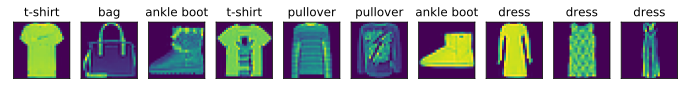

In [10]:
X, y = mnist_train[10: 20]
show_fashion_mnist(X, get_fashion_mnist_labels(y))

#### Read Mini-Batch

In [30]:
    batch_size = 256
    transformer = gdata.vision.transforms.ToTensor() 
    
    # ToTensor=>transform image date format from 'unit8' to 'float32' and divided by 255 ensure each data in 0-1
    # ToTensor: Converts an image NDArray of shape (H x W x C) in the range [0, 255]
    # to a float32 tensor NDArray of shape (C x H x W) in the range [0, 1].
    if sys.platform.startswith('win'): # it is windows operator system
        num_workers = 0 # 0 means that not use extra process to accelerate reading data
    else:
        num_workers = 4 # linux, yeah! That's good!
        
    # get training iterator and testing iterator
    train_iter = gdata.DataLoader(mnist_train.transform_first(transformer), # transform_first ?? 
                                 batch_size, shuffle=True,
                                 num_workers=num_workers)
    test_iter = gdata.DataLoader(mnist_test.transform_first(transformer),
                                batch_size, shuffle=True,
                                num_workers=num_workers)
    # transform_first => Returns a new dataset with the first element of each
    # sample transformed by the transformer function fn. 
    # (first elements are image and second elements are labels, we only need to transform image ndarray)

In [31]:
# test how much time we taking for traversing data
start = time.time()
for X, y in train_iter:
    continue
'%.2f sec'%(time.time() - start) # 4.31 sec. Really bad computer!

'4.29 sec'

### Exercise
1. Decrese batch_size(such as 1). Will it affect the performance of reading?

> Answer: Yes! When batch_size is 1, it takes me 13.74 seconds to traverse the data, while if batch_size equals 256, it just takes me 4.31 seconds.(It also takes me long time, but according to my bad computer, it is reasonable!)

2. If you are non-windows user, please change parameter num_workders to see the effect for the performance of reading data.

> Answer: Sorry, I am windows user, maybe it will be faster? From my perspective, the greatest probability is that too smaller or too bigger is awful, only suitable value make it good performance.

3. Consult MXNet document, what other datasets does `mxnet.gluon.data.vision` provide?

> Answer: `mxnet.gluon.data.vision.datasets`
>  - `MNIST` => MNIST handwriting digit datasets. (28, 28, 1)
>  - `FashionMNIST` => A dataset of Zalando’s article images consisting of fashion products. (28, 28, 1)
>  - `CIFAR10` => CIFAR10 image classification dataset. (32, 32, 3)
>  - `CIFAR100` => CIFAR10 image classification dataset. (32, 32, 3)

4. Consult MXNet document, what other transform method does `mxnet.gluon.data.vision.transforms` provide?

> Answer: a lot of transform functions.  
> [For details, please visit the following website.](http://mxnet.incubator.apache.org/api/python/docs/api/gluon/data/vision/transforms/index.html)